In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set()

In [191]:
sample_size = 100
x = np.random.randint(-3,3, sample_size)
x = np.linspace(-3, 3, sample_size)
x = np.random.normal(-3, 3, sample_size)
x = np.random.normal(0, 1, sample_size)

In [192]:
def dummy(x, sample_size):
    return -1.5 + 2 * x + np.random.randn(sample_size)

In [193]:
y = dummy(x, sample_size)


## Step 0
$$
\hat{y} = -1.5 + 2.0x
$$

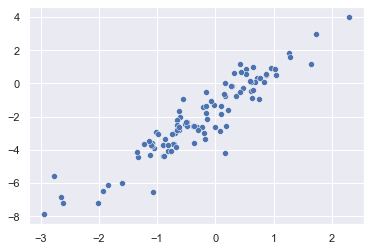

In [194]:
sns.scatterplot(x = x, y = y)

## Step 1

In [195]:
def make_line(x, w0, w1):
    ypred = w0 + w1 * x
    return ypred


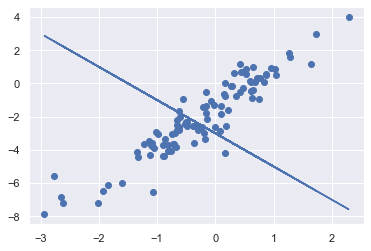

In [196]:
plt.plot(x, make_line(x, -3, -2))
plt.scatter(x, y)

/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


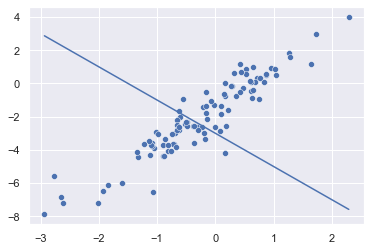

In [197]:

sns.scatterplot(x = x, y = y)
sns.lineplot(x, make_line(x, -3, -2))
plt.show()

## Step 2

In [198]:
def mse(ytrue, ypred):
    error = np.mean((ytrue - ypred)**2)
    return error

In [199]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

## Step 3

In [200]:
def calc_gradient(x, ytrue, w0, w1):

  dw = 0.0001
  ypred = make_line(x, w0, w1)

  #tweak first parameter
  w1_change = w1 + dw
  # calculate predictions using w0 and w1_change
  ypred_w1 = make_line(x, w0, w1_change)
  deriv_w1 = (mse(ytrue, ypred_w1) - mse(ytrue, ypred)) / dw

  # tweak second parameter
  w0_change = w0 + dw
  # calculate predictions using w0_change and w1
  ypred_w0 = make_line(x, w0_change, w1)
  deriv_w0 = (mse(ytrue, ypred_w0) - mse(ytrue, ypred)) / dw

  return [deriv_w0, deriv_w1] # return both derivations as a list

In [201]:
calc_gradient(x, y, 2, 3)

[6.5984280185382715, -0.34596373117423695]

## Step 4

In [204]:
w0 = -1.0
w1 = 5.0
LR = 0.1
MAX_ITER = 500

for i in range(MAX_ITER):
    grad = calc_gradient(x, y, w0, w1)
    print(grad)
    if abs(LR * grad[0]) < 0.0001 and abs(LR *grad[1]) < 0.0001:
        break
    w0 = w0 - LR * grad[0]
    w1 = w1 - LR * grad[1]
    print(i, w0, w1)

[-0.4375594409111727, 5.130115424858417]
0 -0.9562440559088827 4.486988457514158
[-0.08431079050019719, 4.101409356271901]
1 -0.947812976858863 4.076847521886968
[0.14500180058441003, 3.292735645339384]
2 -0.962313156917304 3.74757395735303
[0.28656308225905036, 2.654525058694013]
3 -0.990969465143209 3.4821214514836285
[0.3667531993833961, 2.1488034798888833]
4 -1.0276447850815487 3.26724110349474
[0.4047092324066526, 1.7464101776587526]
5 -1.068115708322214 3.092600085728865
[0.41423033807053145, 1.4248942717753899]
6 -1.109538742129267 2.950110658551326
[0.4051929002901744, 1.1669223972421428]
7 -1.1500580321582845 2.8334184188271117
[0.3846001687168865, 0.9590719373164802]
8 -1.1885180490299732 2.7375112250954636
[0.3573594599592944, 0.7909152801288677]
9 -1.2242539950259026 2.658419697082577
[0.3268564835523513, 0.654323915473265]
10 -1.2569396433811377 2.5929873055352504
[0.2953787553849896, 0.5429387514455097]
11 -1.2864775189196367 2.5386934303906994
[0.2644268911966563, 0.4517

/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


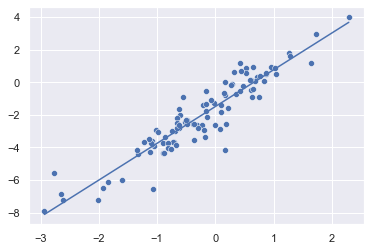

In [205]:

sns.scatterplot(x = x, y = y)
sns.lineplot(x, make_line(x, w0, w1))
plt.show()